In [4]:
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import numpy as np
from itertools import product
from tqdm import tqdm
import sys
sys.path.append('../src')
from models import open_pickle, filter_terms_not_in_wemodel

In [5]:
we_model_name = "sg_dim300_min100_win5"
we_vector_size = 300
we_model_dir = '../data/external/wiki-english/wiki-english-20171001/%s' % we_model_name

we_model = Word2Vec.load(we_model_dir+'/model.gensim')
print ('loading done!')

loading done!


In [27]:
RESULTS_FILEPATH = '../data/interim/association_metric_exps.pickle'
EXPERIMENT_DEFINITION_FILEPATH = '../data/interim/experiment_definitions.pickle'
IMAGE_SAVE_FILEPATH = '../reports/figures/exp_results.png'
NONRELATIVE_IMAGE_SAVE_FILEPATH = '../reports/figures/nonrelative_exp_results.png'

exp_def_dict = open_pickle(EXPERIMENT_DEFINITION_FILEPATH)
results_dict = open_pickle(RESULTS_FILEPATH)

In [7]:
results_dict[2]['second']

{'X_array': array([0.06205934, 0.09165296, 0.0919002 , 0.11380053, 0.09113181,
        0.11897811, 0.10779971, 0.08894435, 0.11067972, 0.14237365,
        0.09621373, 0.1135487 , 0.14185229, 0.06471875, 0.08086327,
        0.15060195, 0.12328166, 0.13162217, 0.18247157, 0.08507252,
        0.04209799, 0.12344435, 0.08338574, 0.09611011], dtype=float32),
 'Y_array': array([ 0.20805708, -0.08329672, -0.09894511,  0.01462591, -0.12913164,
        -0.04405615, -0.02649808, -0.0268372 ,  0.05020308, -0.01089379,
        -0.04618579, -0.09935915, -0.03268984, -0.01189023, -0.25332013,
        -0.15611374, -0.1442793 , -0.12644878, -0.21717617,  0.0141916 ,
        -0.12324518,  0.01065516,  0.03379461,  0.03538892], dtype=float32),
 'X_mean': 0.105608545,
 'Y_mean': -0.052643776,
 'threshold': 0.0380725,
 'pct_5': 0.006891302671283487,
 'pct_95': 0.557002368569374,
 'A_biases': array([0.5008259 , 0.3699408 , 0.22995502, 0.42247248, 0.3397562 ,
        0.36337355, 0.25808394, 0.32315367, 0.51

In [22]:
def add_axes_obj_labels(ax, exp_num, target_label, A_label, B_label, n_samples):
    TITLE_FONT_SIZE = 12
    [target_label, A_label, B_label] = [s.upper() for s in [target_label, A_label, B_label]]
    ax.set_title(f'#{exp_num}: {target_label} terms: {B_label} (left) vs. {A_label} (right)',
                fontsize=TITLE_FONT_SIZE)
    ax.set_xlabel(f'Bias Regions: CI with {n_samples} samples')
    ax.set_ylabel(f'Word')
    ax.yaxis.set_ticklabels([])

In [9]:
def annotate_points(ax, terms, x_array, y):
    POINT_FONT_SIZE = 9
    for i, txt in enumerate(terms):
        ax.annotate(txt, (x_array[i], y[i]), fontsize=POINT_FONT_SIZE)

In [30]:
def add_scatters_and_lines(ax, arr_second, threshold_second,
                   mean_second, pct_5_second, pct_95_second, lower_bound, upper_bound, 
                           ST1_80CI, ST2_90CI, ST3_90CI, y):
    S = 20 # Marker size
    ZERO_LINE_COLOR = 'lime'
    FIRST_ORDER_COLOR = 'black'
    SECOND_ORDER_COLOR = 'red'
    SECOND_ORDER_PERCENTILES_COLOR = 'blue'
    SHADE_DARKNESS = 0.2
    SHADE_DARKNESS_80CI = 0.1
    SHADE_DARKNESS_90CI = 0.15
    SHADE_DARKNESS_95CI = 0.25
    CI_COLOR = 'black'
    XAXIS_LIMIT = 0.6
    
    y = [i for i in range(1,len(arr_second)+1)]
    ax.scatter(arr_second, y, c=SECOND_ORDER_COLOR, s=S)
    ax.xaxis.grid()
    #ax.axvline(threshold_second, color=SECOND_ORDER_COLOR, linestyle='-.', label='second-order threshold')
    #ax.axvline(-threshold_second, color=SECOND_ORDER_COLOR, linestyle='-.')
    #ax.axvline(mean_second, c=SECOND_ORDER_COLOR, label='second-order mean')
    #ax.axvspan(lower_bound, upper_bound, alpha=SHADE_DARKNESS, color=SECOND_ORDER_PERCENTILES_COLOR)
    ax.axvspan(ST1_80CI[0], ST1_80CI[1], alpha=SHADE_DARKNESS_80CI, color=CI_COLOR)
    ax.axvspan(ST1_90CI[0], ST1_90CI[1], alpha=SHADE_DARKNESS_90CI, color=CI_COLOR)
    ax.axvspan(ST1_95CI[0], ST1_95CI[1], alpha=SHADE_DARKNESS_95CI, color=CI_COLOR)
    #ax.axvspan(pct_5_second, pct_95_second, alpha=SHADE_DARKNESS, color=SECOND_ORDER_PERCENTILES_COLOR)
    ax.set_xlim(-XAXIS_LIMIT, XAXIS_LIMIT)

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 115.72it/s]
No handles with labels found to put in legend.


Rendering...


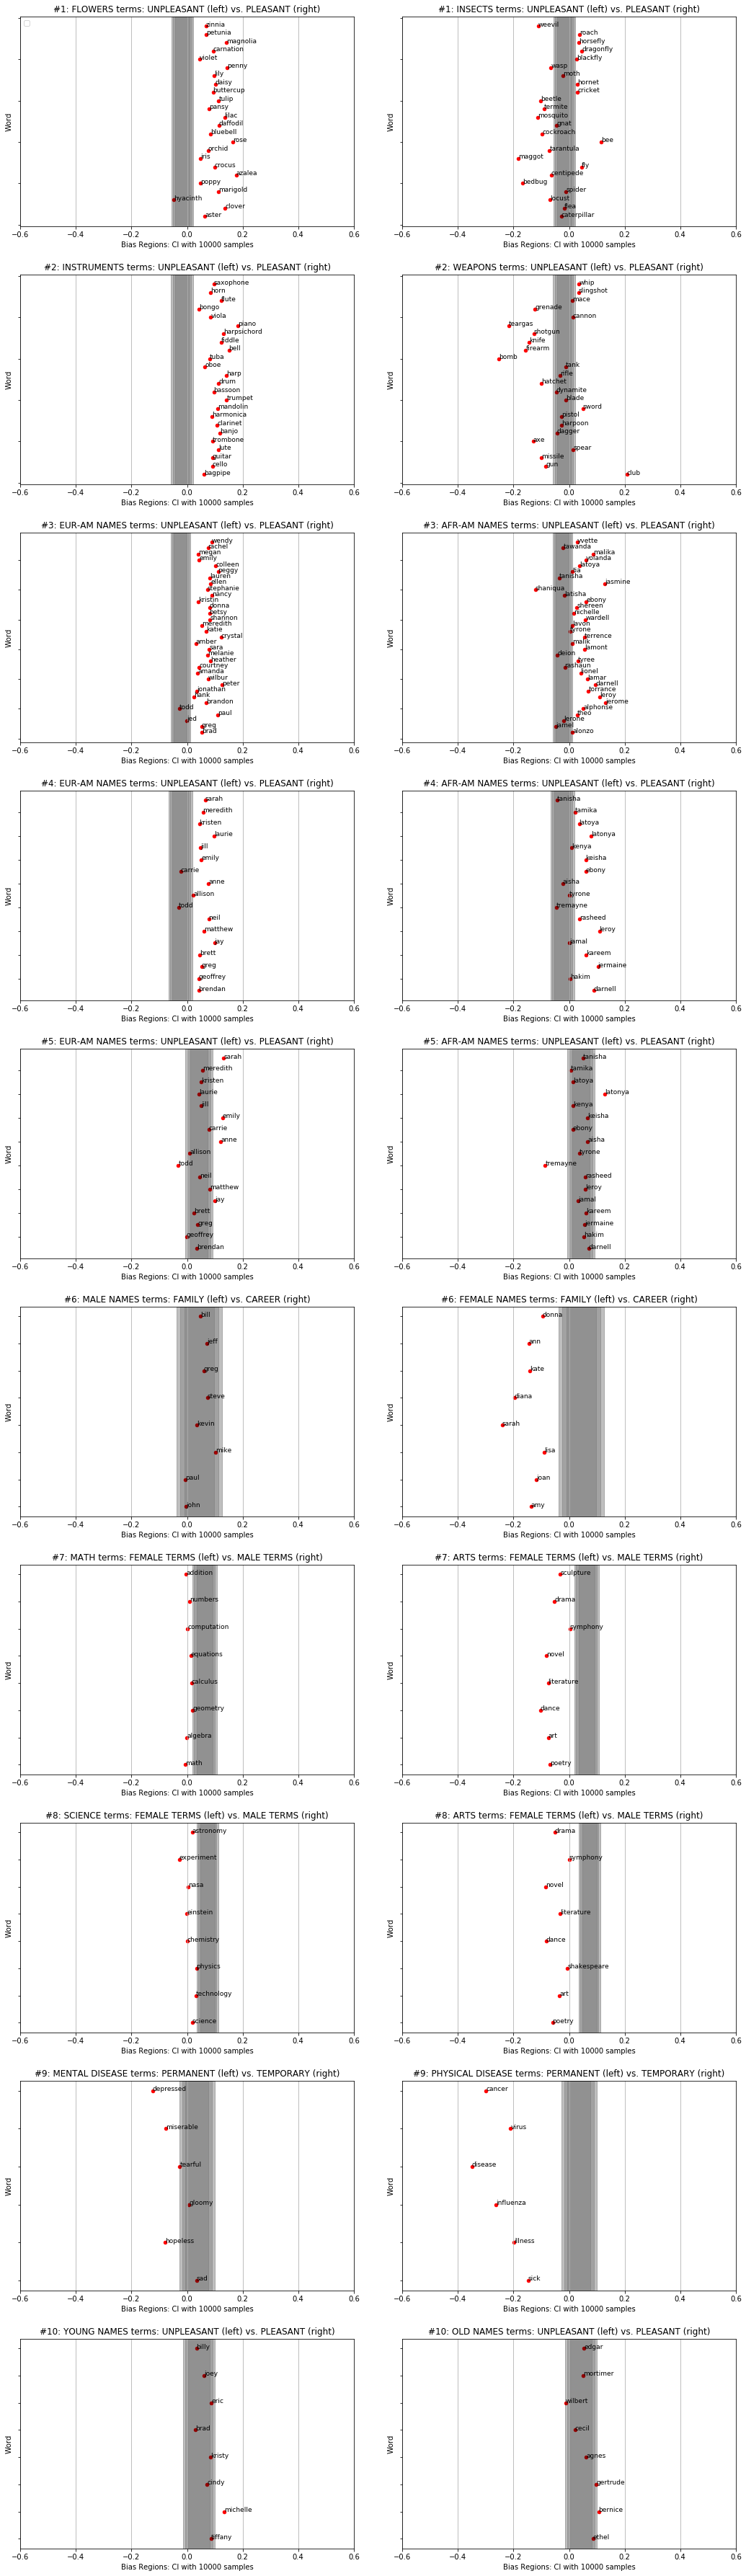

In [31]:
fig, axs = plt.subplots(10,2, figsize=(15,50))
LEGEND_SIZE = 10

exps = range(1,11)
target_letters = ['X','Y']
for exp_num, target_letter in tqdm(product(exps, target_letters), total=20):
    col = 0 if target_letter =='X' else 1
    ax = axs[exp_num-1, col]
    
    arr_second = results_dict[exp_num]['second'][f'{target_letter}_array']
    threshold_second = results_dict[exp_num]['second']['threshold']
    mean_second = results_dict[exp_num]['second'][f'{target_letter}_mean']
    pct_5_second = results_dict[exp_num]['second']['pct_5']
    pct_95_second = results_dict[exp_num]['second']['pct_95']
    lower_bound = results_dict[exp_num]['second']['lower_bound']
    upper_bound = results_dict[exp_num]['second']['upper_bound']
    ST1_80CI = results_dict[exp_num]['second']['ST1_80CI']
    ST1_90CI = results_dict[exp_num]['second']['ST1_90CI']
    ST1_95CI = results_dict[exp_num]['second']['ST1_95CI']
    n_samples = len(results_dict[exp_num]['second']['sigtest_dist_1'])
    y = [i for i in range(1,len(arr_second)+1)]
    terms = exp_def_dict[exp_num][f'{target_letter}_terms']
    target_label = exp_def_dict[exp_num][f'{target_letter}_label']
    A_label = exp_def_dict[exp_num]['A_label']
    B_label = exp_def_dict[exp_num]['B_label']
    
    
    add_scatters_and_lines(ax, arr_second, threshold_second,
                   mean_second, pct_5_second, pct_95_second, lower_bound, upper_bound, 
                           ST1_80CI, ST1_90CI, ST1_95CI, y)
    annotate_points(ax, terms, arr_second, y)
    add_axes_obj_labels(ax, exp_num, target_label, A_label, B_label, n_samples)
axs[0,0].legend(loc=2, prop={'size': LEGEND_SIZE})
fig.tight_layout(pad=2)
print('Rendering...')
plt.savefig(IMAGE_SAVE_FILEPATH)
plt.show()

In [32]:
open_pickle(EXPERIMENT_DEFINITION_FILEPATH)

defaultdict(dict,
            {1: {'X_terms': ['aster',
               'clover',
               'hyacinth',
               'marigold',
               'poppy',
               'azalea',
               'crocus',
               'iris',
               'orchid',
               'rose',
               'bluebell',
               'daffodil',
               'lilac',
               'pansy',
               'tulip',
               'buttercup',
               'daisy',
               'lily',
               'penny',
               'violet',
               'carnation',
               'magnolia',
               'petunia',
               'zinnia'],
              'Y_terms': ['caterpillar',
               'flea',
               'locust',
               'spider',
               'bedbug',
               'centipede',
               'fly',
               'maggot',
               'tarantula',
               'bee',
               'cockroach',
               'gnat',
               'mosquito',
               'termi